In [9]:
# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [11]:
tweets_df = pd.read_csv("apple_twitter_sentiment_dfe.csv")

In [12]:
tweets001_df = tweets_df[['date', 'text']]

In [13]:
tweets001_df

,date,text
0,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...
3,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...
4,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL
...,...,...
3881,Tue Dec 09 22:08:53 +0000 2014,(Via FC) Apple Is Warming Up To Social Media -...
3882,Tue Dec 09 22:18:27 +0000 2014,RT @MMLXIV: there is no avocado emoji may I as...
3883,Tue Dec 09 23:45:59 +0000 2014,@marcbulandr I could not agree more. Between @...
3884,Wed Dec 10 00:48:10 +0000 2014,My iPhone 5's photos are no longer downloading...


In [14]:
apple_refs = ['Apple', 'Steve Jobs', 'Apple\'s']
AAPL_refs = ['AAPL', 'AAPL\'s']

Preprocess

In [15]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) != -1:
            flag =1
    return flag

tweets001_df['Apple'] = tweets001_df['text'].apply(lambda x: identify_subject(x, apple_refs))
tweets001_df['AAPL'] = tweets001_df['text'].apply(lambda x: identify_subject(x, AAPL_refs))

tweets001_df.head(10)

/var/folders/c4/gqsbg0l52tb34m4xr9332xfm0000gn/T/ipykernel_33321/2993964104.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets001_df['Apple'] = tweets001_df['text'].apply(lambda x: identify_subject(x, apple_refs))
/var/folders/c4/gqsbg0l52tb34m4xr9332xfm0000gn/T/ipykernel_33321/2993964104.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets001_df['AAPL'] = tweets001_df['text'].apply(lambda x: identify_subject(x, AAPL_refs))


,date,text,Apple,AAPL
0,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...,1,1
1,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,0,1
2,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...,1,0
3,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...,1,1
4,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL,0,1
5,Mon Dec 01 20:30:03 +0000 2014,#AAPL:5 Rocket Stocks to Buy for December Gain...,1,1
6,Mon Dec 01 20:32:45 +0000 2014,Top 3 all @Apple #tablets. Damn right! http://...,1,0
7,Mon Dec 01 20:34:31 +0000 2014,CNBCTV: #Apple's margins better than expected?...,1,0
8,Mon Dec 01 20:36:47 +0000 2014,Apple Inc. Flash Crash: What You Need to Know ...,1,1
9,Mon Dec 01 20:45:03 +0000 2014,#AAPL:This Presentation Shows What Makes The W...,0,1


In [4]:
import nltk
from nltk.corpus import stopwords

from textblob import Word, TextBlob

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words('english')
custom_stopwords = ['RT']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rudolph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rudolph/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/rudolph/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [18]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

tweets001_df['Processed Tweet'] = tweets001_df['text'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
tweets001_df.head()

/var/folders/c4/gqsbg0l52tb34m4xr9332xfm0000gn/T/ipykernel_33321/1172915314.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets001_df['Processed Tweet'] = tweets001_df['text'].apply(lambda x: preprocess_tweets(x, custom_stopwords))


,date,text,Apple,AAPL,Processed Tweet
0,Mon Dec 01 19:30:03 +0000 2014,#AAPL:The 10 best Steve Jobs emails ever...htt...,1,1,#AAPL:The 10 best Steve Jobs email ever...http...
1,Mon Dec 01 19:43:51 +0000 2014,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,0,1,@JPDesloges: Why AAPL Stock Had Mini-Flash Cra...
2,Mon Dec 01 19:50:28 +0000 2014,My cat only chews @apple cords. Such an #Apple...,1,0,My cat chew @apple cords. Such #AppleSnob.
3,Mon Dec 01 20:26:34 +0000 2014,I agree with @jimcramer that the #IndividualIn...,1,1,I agree @jimcramer #IndividualInvestor trade #...
4,Mon Dec 01 20:29:33 +0000 2014,Nobody expects the Spanish Inquisition #AAPL,0,1,Nobody expects Spanish Inquisition #AAPL


In [19]:
print('Base review\n', tweets001_df['text'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', tweets001_df['Processed Tweet'][0])

Base review
 #AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx

------------------------------------

Cleaned and lemmatized review
 #AAPL:The 10 best Steve Jobs email ever...http://t.co/82G1kL94tx


Calculate Sentiment

In [20]:

tweets001_df['polarity'] = tweets001_df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
tweets001_df['subjectivity'] = tweets001_df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
tweets001_df[['Processed Tweet', 'Apple', 'AAPL', 'polarity', 'subjectivity']].head()

/var/folders/c4/gqsbg0l52tb34m4xr9332xfm0000gn/T/ipykernel_33321/1461832900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets001_df['polarity'] = tweets001_df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
/var/folders/c4/gqsbg0l52tb34m4xr9332xfm0000gn/T/ipykernel_33321/1461832900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets001_df['subjectivity'] = tweets001_df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])


,Processed Tweet,Apple,AAPL,polarity,subjectivity
0,#AAPL:The 10 best Steve Jobs email ever...http...,1,1,1.0,0.3
1,@JPDesloges: Why AAPL Stock Had Mini-Flash Cra...,0,1,0.0,0.0
2,My cat chew @apple cords. Such #AppleSnob.,1,0,0.0,0.5
3,I agree @jimcramer #IndividualInvestor trade #...,1,1,0.7,0.6
4,Nobody expects Spanish Inquisition #AAPL,0,1,0.0,0.0


In [21]:
display(tweets001_df[tweets001_df['Apple']==1][['Apple','polarity','subjectivity']].groupby('Apple').agg([np.mean, np.max, np.min, np.median]))
tweets001_df[tweets001_df['AAPL']==1][['AAPL','polarity','subjectivity']].groupby('AAPL').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                 
          mean amax amin median         mean amax amin median
Apple                                                        
1      0.04181  1.0 -1.0    0.0     0.253889  1.0  0.0  0.125

polarity                  subjectivity                 
          mean amax amin median         mean amax amin median
AAPL                                                         
1     0.070871  1.0 -1.0    0.0      0.22034  1.0  0.0    0.0

Visualise

In [23]:
AAPL = tweets001_df[tweets001_df['AAPL']==1][['date', 'polarity']]
AAPL = AAPL.sort_values(by='date', ascending=True)
AAPL['MA Polarity'] = AAPL.polarity.rolling(10, min_periods=3).mean()

Apple = tweets001_df[tweets001_df['Apple']==1][['date', 'polarity']]
Apple = Apple.sort_values(by='date', ascending=True)
Apple['MA Polarity'] = Apple.polarity.rolling(10, min_periods=3).mean()

In [24]:
Apple.head()

,date,polarity,MA Polarity
1755,Fri Dec 05 00:02:35 +0000 2014,0.0,NaN
1759,Fri Dec 05 00:05:43 +0000 2014,0.0,NaN
1761,Fri Dec 05 00:12:24 +0000 2014,0.8,0.266667
1762,Fri Dec 05 00:14:22 +0000 2014,0.0,0.200000
1764,Fri Dec 05 00:21:29 +0000 2014,0.0,0.160000


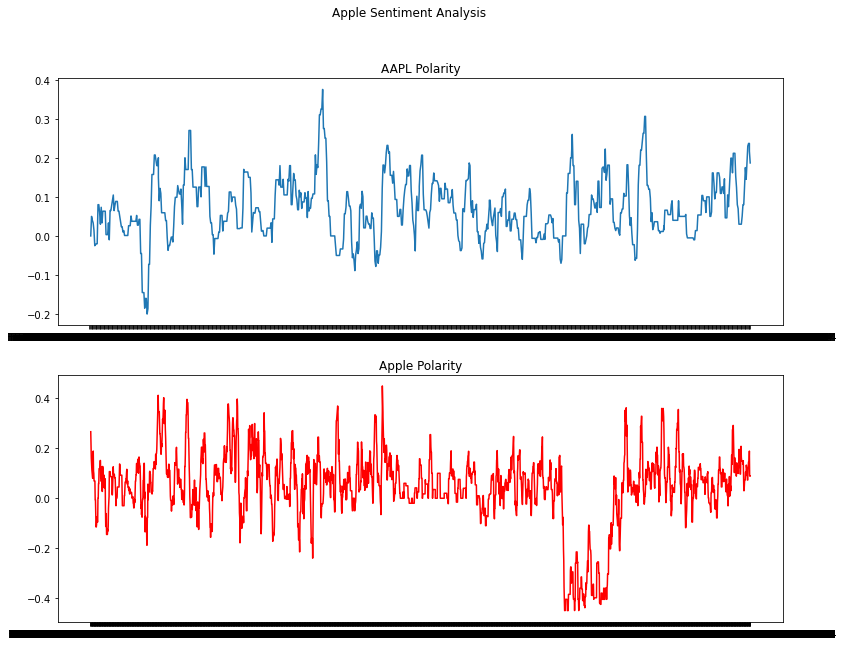

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(AAPL['date'], AAPL['MA Polarity'])
axes[0].set_title("\n".join(["AAPL Polarity"]))
axes[1].plot(Apple['date'], Apple['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Apple Polarity"]))

fig.suptitle("\n".join(["Apple Sentiment Analysis"]), y=0.98)

plt.show()